# Import Module for Data Analysis

In [1]:
# Import Common Module for data analysis

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns


# DATA ACQUISTION

In [2]:
# How to read/ load data as dataframe
df=pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Finance_data.csv')

In [3]:
# How Dataframe look like
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [4]:
# Dimensions 

df.shape

(40, 24)

In [5]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

# Filtering Dataset

In [6]:
# checking duplicate 

df.duplicated().sum()

0

In [7]:
# Data Claening

#Examining Null values in each feature
df.isnull().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

There are no Duplicated Values present in the dataset.

In [8]:
# Drop unneccesary Colomn in our dataset 

df.drop(['Mutual_Funds', 'Equity_Market', 'PPF', 'Government_Bonds', 'Fixed_Deposits', 'Debentures', "Gold"], axis = 1, inplace = True)

In [9]:
#Repalce All Empty Colomn

#df = df.replace(r'^\s*$', np.nan, regex = True)

# Data Exploration

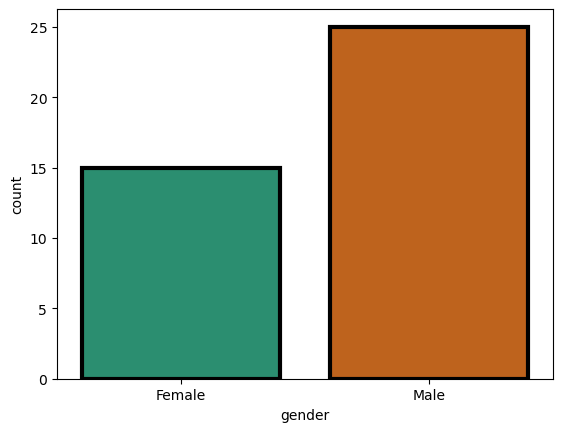

In [10]:
# Visualizing our data

sns.countplot(x = 'gender', data = df, linewidth = 3, palette='Dark2', edgecolor = "black")
plt.show()

Text(0.5, 0, 'GENDER')

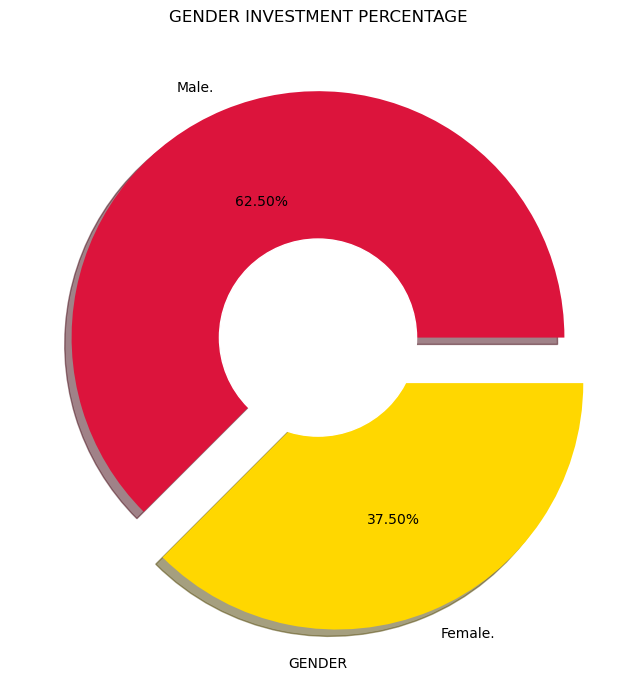

In [11]:
# Let visualize Gender Investment  percentage

plt.figure(figsize=(8,8))
plt.pie(df['gender'].value_counts(), labels=['Male.','Female.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('GENDER INVESTMENT PERCENTAGE')
plt.xlabel('GENDER')

We can see that 62.50% of Male Invest while 37.50% of Female Invest 

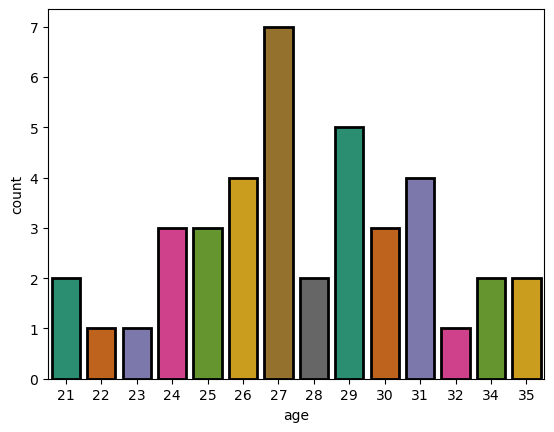

In [12]:
sns.countplot(x = 'age', data = df, linewidth = 2, palette='Dark2', edgecolor = "black")
plt.show()

We can see from the above graph that most of our respondents were in the ages 24-31

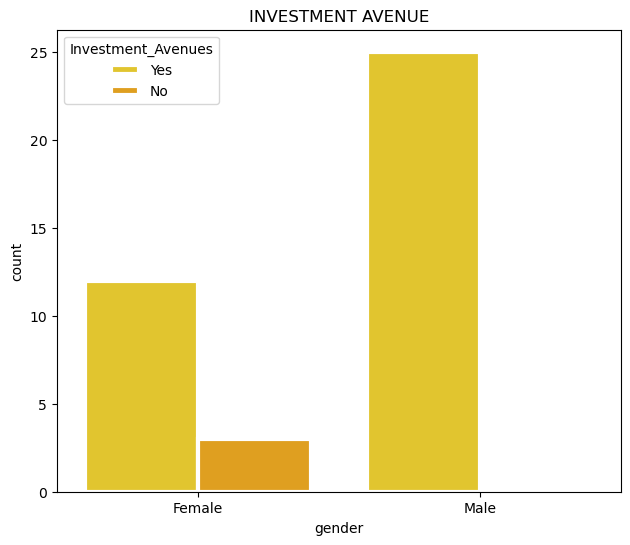

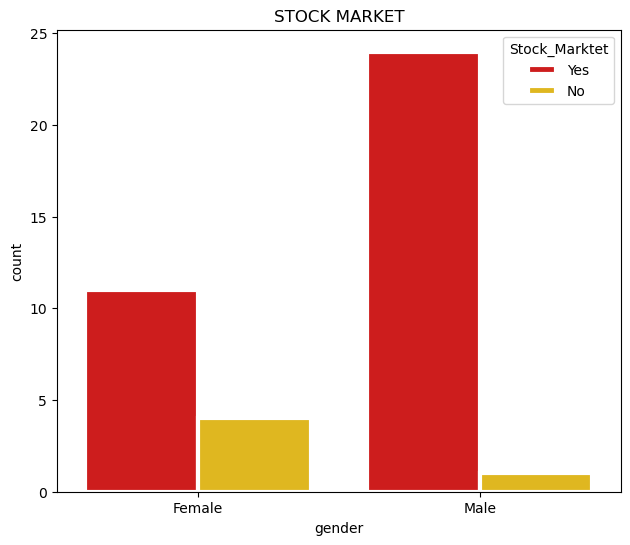

In [13]:
#Inetments and stock market  (Grouped) Count

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
sns.countplot(x=df['gender'], hue = df['Investment_Avenues'], palette='Wistia', linewidth = 3, edgecolor = 'white')
plt.title('INVESTMENT AVENUE')


plt.figure(figsize=(16,6))

plt.subplot(1, 2, 2)
sns.countplot(x=df['gender'], hue = df['Stock_Marktet'], palette='hot', linewidth = 3, edgecolor = 'white')
plt.title('STOCK MARKET')
plt.show()


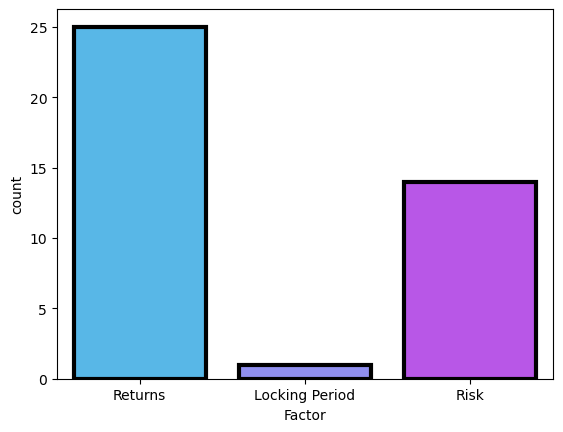

In [14]:
# factor Affect investment

sns.countplot(x=df['Factor'], palette='cool', linewidth = 3, edgecolor = 'black')
plt.show()

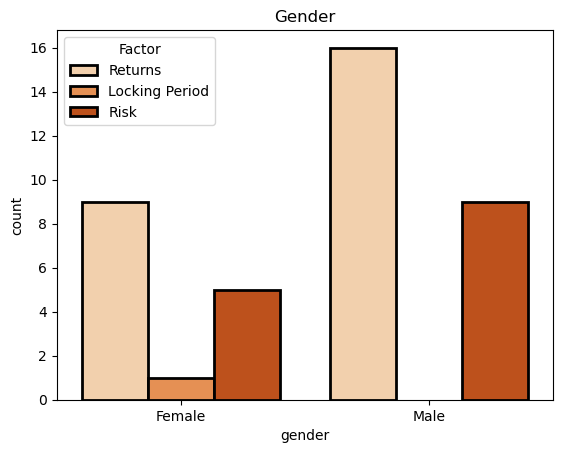

In [15]:
# Lets see which Age groups take the highest risk 

sns.countplot(x=df['gender'],hue=df['Factor'],palette='Oranges',linewidth=2,edgecolor='black')
plt.title('Gender')
plt.show()

We can see that Male take high risk in investment with high reuturn 

Text(0.5, 0, 'FACTORS')

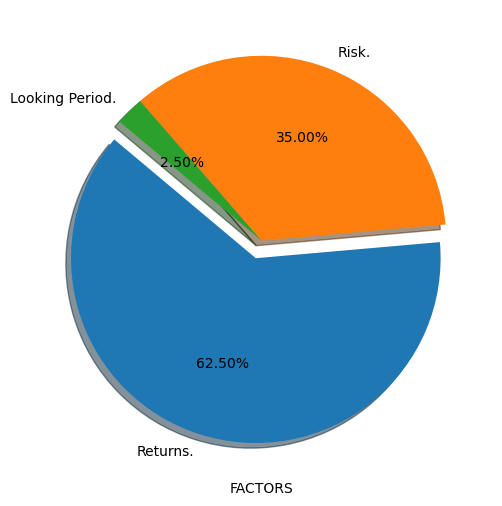

In [16]:
# Lets see which Age groups percetage with highest risk 

plt.figure(figsize=(6,6))
explode = (0.1, 0, 0 )
plt.pie(df['Factor'].value_counts(), labels=['Returns.', 'Risk.', 'Looking Period.'], autopct='%1.2f%%', explode=explode, shadow=True, startangle=140)
plt.xlabel('FACTORS')

The above pie chat shows that 62.5% of people are less worried about risks involved and more worried about the money which they will get back

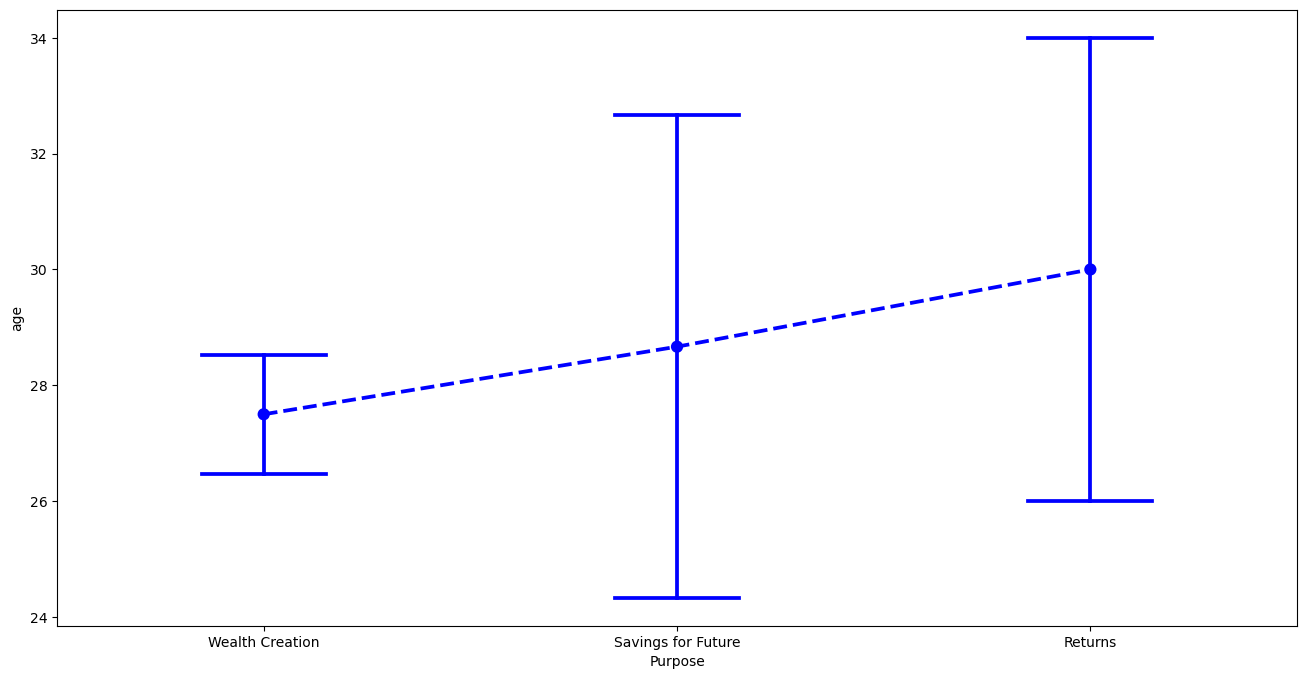

In [17]:
plt.figure(figsize=(16,8))
sns.pointplot(x= "Purpose", y= "age", data = df, linestyles = "--", capsize = .3, color = 'Blue')
plt.show()

Text(0.5, 1.0, 'INVESTMENT MONITORING')

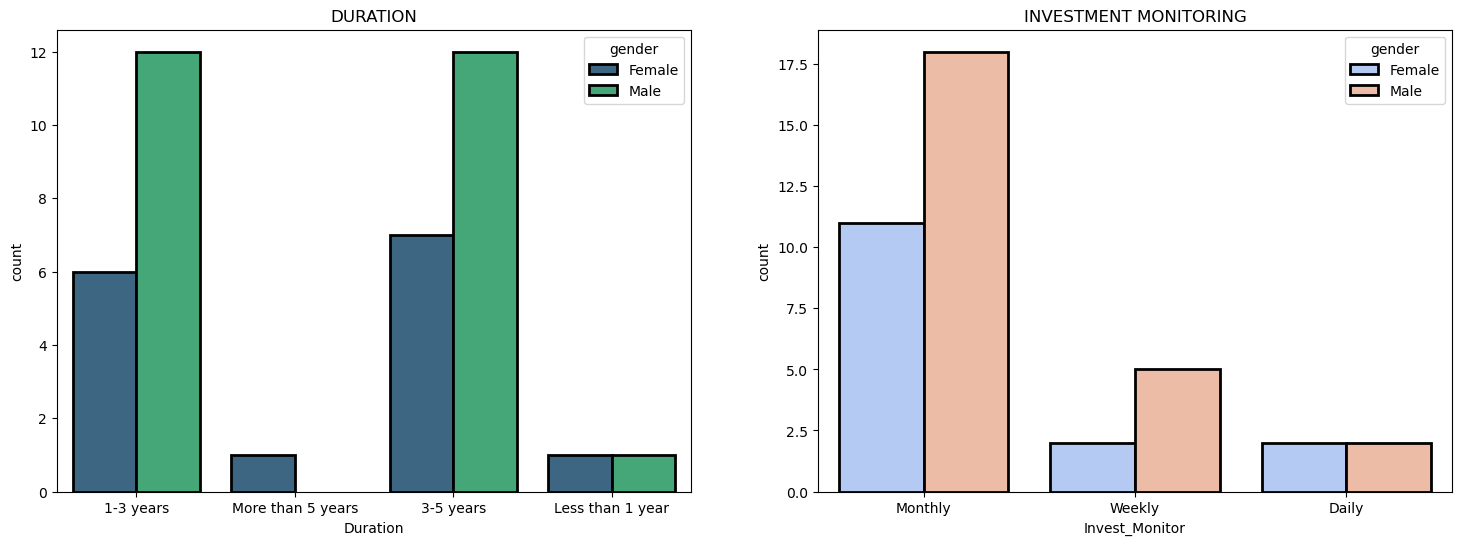

In [18]:
# Now lets see these same factors of Duration and Invest_monitor with gender

plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
sns.countplot(x=df['Duration'], hue = df['gender'], palette = 'viridis', linewidth = 2, edgecolor = 'Black')
plt.title('DURATION')

plt.subplot(1, 2, 2)
sns.countplot(x=df['Invest_Monitor'], hue = df['gender'], palette = 'coolwarm', linewidth = 2, edgecolor = 'Black')
plt.title('INVESTMENT MONITORING')
